In [5]:
import numpy as np
import matplotlib.pyplot as plt
from process_images import *
from numpy_to_pandas import numpy_to_pandas_dataset
from utils import *

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Parte 1

In [7]:
data = np.load("processed_dataset.npz")
df = numpy_to_pandas_dataset("processed_dataset.npz")
df.columns

Index(['pixel_00000', 'pixel_00001', 'pixel_00002', 'pixel_00003',
       'pixel_00004', 'pixel_00005', 'pixel_00006', 'pixel_00007',
       'pixel_00008', 'pixel_00009',
       ...
       'pixel_04087', 'pixel_04088', 'pixel_04089', 'pixel_04090',
       'pixel_04091', 'pixel_04092', 'pixel_04093', 'pixel_04094',
       'pixel_04095', 'label'],
      dtype='object', length=4097)

Ahora tenemos en df un DataFrame con las siguientes columnas:
- pixel_00000 - pixel_16383: 16384 (128x128) columnas, una para cada pixel, con un valor 0-255 de la escala de grises
- label: 0 si es Healthy, 1 si es Parkinson

## Ejercicio 2

In [8]:
# Dividimos el dataset en datos de entrenamiento y datos de test (80/20)

# Separar features (píxeles) y target (label)
X = df.drop('label', axis=1).values  # Convertir a numpy array
y = df['label'].values               # Convertir a numpy array

# Configuración del split
test_size = 0.2
random_state = 42
np.random.seed(random_state)  # Para reproducibilidad

# Obtener índices aleatorios
n_samples = len(X)
n_test = int(n_samples * test_size)
indices = np.random.permutation(n_samples)

# Dividir índices
test_indices = indices[:n_test]
train_indices = indices[n_test:]

# Crear splits
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

print(f"Dataset completo: {len(X)} muestras")
print(f"Train set: {len(X_train)} muestras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} muestras ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nDistribución de clases en train:")
print(f"  - Healthy (0): {np.sum(y_train == 0)}")
print(f"  - Parkinson (1): {np.sum(y_train == 1)}")
print(f"\nDistribución de clases en test:")
print(f"  - Healthy (0): {np.sum(y_test == 0)}")
print(f"  - Parkinson (1): {np.sum(y_test == 1)}")

Dataset completo: 1632 muestras
Train set: 1306 muestras (80.0%)
Test set: 326 muestras (20.0%)

Distribución de clases en train:
  - Healthy (0): 637
  - Parkinson (1): 669

Distribución de clases en test:
  - Healthy (0): 179
  - Parkinson (1): 147


## Ejercicio 3

In [9]:
w_final, metrics = gradient_descent(X_train, y_train, X_test, y_test, alpha=1e-11, num_it=10000)
plot_metrics(metrics)

Iteración 0: Train MSE=0.2513, Acc=0.5161 | Test MSE=0.2553, Acc=0.4663
Iteración 100: Train MSE=0.2496, Acc=0.5222 | Test MSE=0.2501, Acc=0.5123
Iteración 200: Train MSE=0.2490, Acc=0.5306 | Test MSE=0.2495, Acc=0.5184
Iteración 300: Train MSE=0.2483, Acc=0.5383 | Test MSE=0.2490, Acc=0.5307
Iteración 400: Train MSE=0.2477, Acc=0.5436 | Test MSE=0.2484, Acc=0.5368
Iteración 500: Train MSE=0.2471, Acc=0.5482 | Test MSE=0.2479, Acc=0.5460
Iteración 600: Train MSE=0.2465, Acc=0.5528 | Test MSE=0.2474, Acc=0.5583


KeyboardInterrupt: 

## Ejercicio 4


Iteración 0: Train MSE=0.2501, Acc=0.4877 | Test MSE=0.2497, Acc=0.5491
Iteración 100: Train MSE=0.2489, Acc=0.5123 | Test MSE=0.2504, Acc=0.4509
Iteración 200: Train MSE=0.2479, Acc=0.5123 | Test MSE=0.2496, Acc=0.4509
Iteración 300: Train MSE=0.2470, Acc=0.5322 | Test MSE=0.2488, Acc=0.4632
Iteración 400: Train MSE=0.2461, Acc=0.5704 | Test MSE=0.2481, Acc=0.4847
Iteración 500: Train MSE=0.2451, Acc=0.6057 | Test MSE=0.2473, Acc=0.5276
Iteración 600: Train MSE=0.2442, Acc=0.6256 | Test MSE=0.2466, Acc=0.5644
Iteración 700: Train MSE=0.2433, Acc=0.6348 | Test MSE=0.2458, Acc=0.5890
Iteración 800: Train MSE=0.2424, Acc=0.6585 | Test MSE=0.2451, Acc=0.6196
Iteración 900: Train MSE=0.2415, Acc=0.6792 | Test MSE=0.2444, Acc=0.6258
Iteración 1000: Train MSE=0.2407, Acc=0.6983 | Test MSE=0.2437, Acc=0.6564
Iteración 1100: Train MSE=0.2398, Acc=0.7098 | Test MSE=0.2430, Acc=0.6656
Iteración 1200: Train MSE=0.2389, Acc=0.7167 | Test MSE=0.2423, Acc=0.6840
Iteración 1300: Train MSE=0.2381, Acc

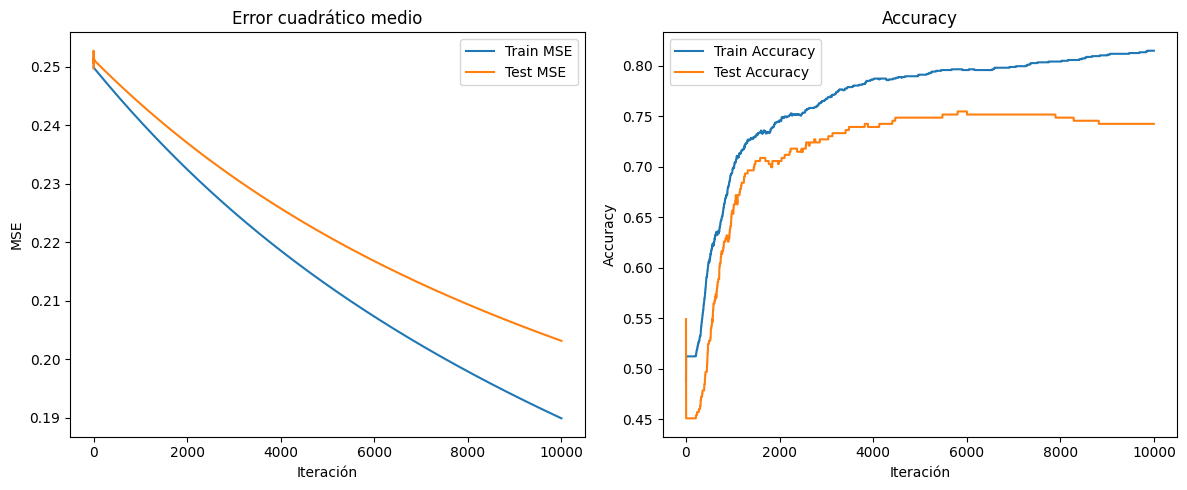

In [14]:
# Normalizamos los valores
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

w_final, b_final, metrics = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, alpha=1e-6, num_it=10000)

plot_metrics(metrics)

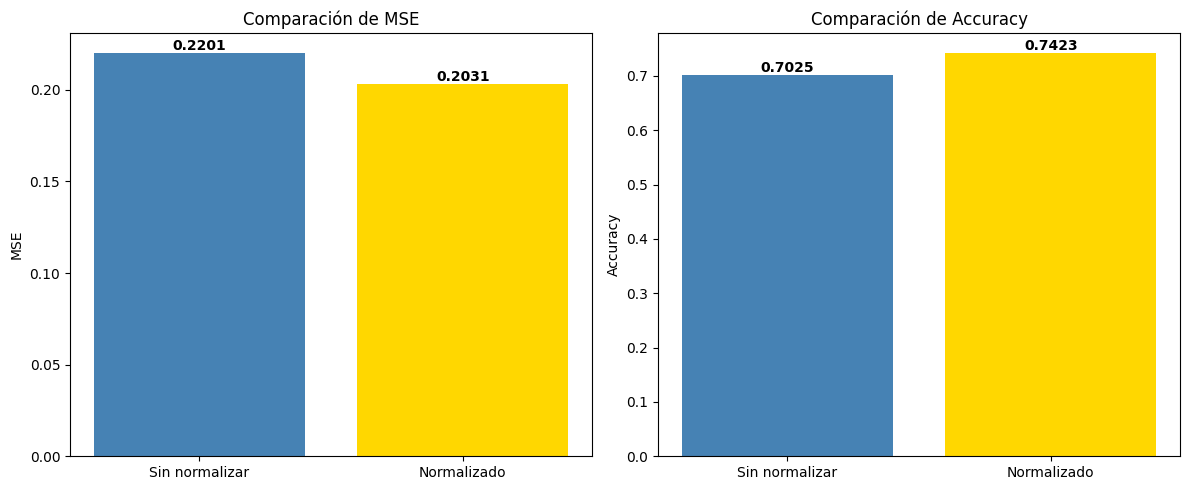

Mejora en MSE: 7.72%
Mejora en Accuracy: 5.67%


In [29]:
# Comparación de resultados con y sin normalización
non_norm_mse = 0.2201
non_norm_acc = 0.7025
norm_mse = 0.2031
norm_acc = 0.7423

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot MSE comparison
categories = ['Sin normalizar', 'Normalizado']
mse_values = [non_norm_mse, norm_mse]
colors = ['steelblue', 'gold']

ax1.bar(categories, mse_values, color=colors)
ax1.set_ylabel('MSE')
ax1.set_title('Comparación de MSE')
for i, v in enumerate(mse_values):
    ax1.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot Accuracy comparison
acc_values = [non_norm_acc, norm_acc]

ax2.bar(categories, acc_values, color=colors)
ax2.set_ylabel('Accuracy')
ax2.set_title('Comparación de Accuracy')
for i, v in enumerate(acc_values):
    ax2.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Imprimir mejoras
mse_improvement = ((non_norm_mse - norm_mse) / non_norm_mse) * 100
acc_improvement = ((norm_acc - non_norm_acc) / non_norm_acc) * 100

print(f"Mejora en MSE: {mse_improvement:.2f}%")
print(f"Mejora en Accuracy: {acc_improvement:.2f}%")


## Ejercicio 5


Descenso de gradiente para alpha = 1e-06
Iteración 0: Train MSE=0.2499, Acc=0.5123 | Test MSE=0.2504, Acc=0.4509
Iteración 100: Train MSE=0.2489, Acc=0.5123 | Test MSE=0.2504, Acc=0.4509
Iteración 200: Train MSE=0.2480, Acc=0.5123 | Test MSE=0.2496, Acc=0.4509
Iteración 300: Train MSE=0.2470, Acc=0.5314 | Test MSE=0.2488, Acc=0.4601
Iteración 400: Train MSE=0.2461, Acc=0.5681 | Test MSE=0.2481, Acc=0.4877
Iteración 500: Train MSE=0.2452, Acc=0.6080 | Test MSE=0.2473, Acc=0.5276
Iteración 600: Train MSE=0.2442, Acc=0.6240 | Test MSE=0.2466, Acc=0.5675
Iteración 700: Train MSE=0.2433, Acc=0.6355 | Test MSE=0.2458, Acc=0.5859
Iteración 800: Train MSE=0.2424, Acc=0.6570 | Test MSE=0.2451, Acc=0.6227
Iteración 900: Train MSE=0.2416, Acc=0.6799 | Test MSE=0.2444, Acc=0.6288
Iteración 1000: Train MSE=0.2407, Acc=0.6960 | Test MSE=0.2437, Acc=0.6626
Iteración 1100: Train MSE=0.2398, Acc=0.7121 | Test MSE=0.2430, Acc=0.6656
Iteración 1200: Train MSE=0.2390, Acc=0.7167 | Test MSE=0.2423, Acc=0.

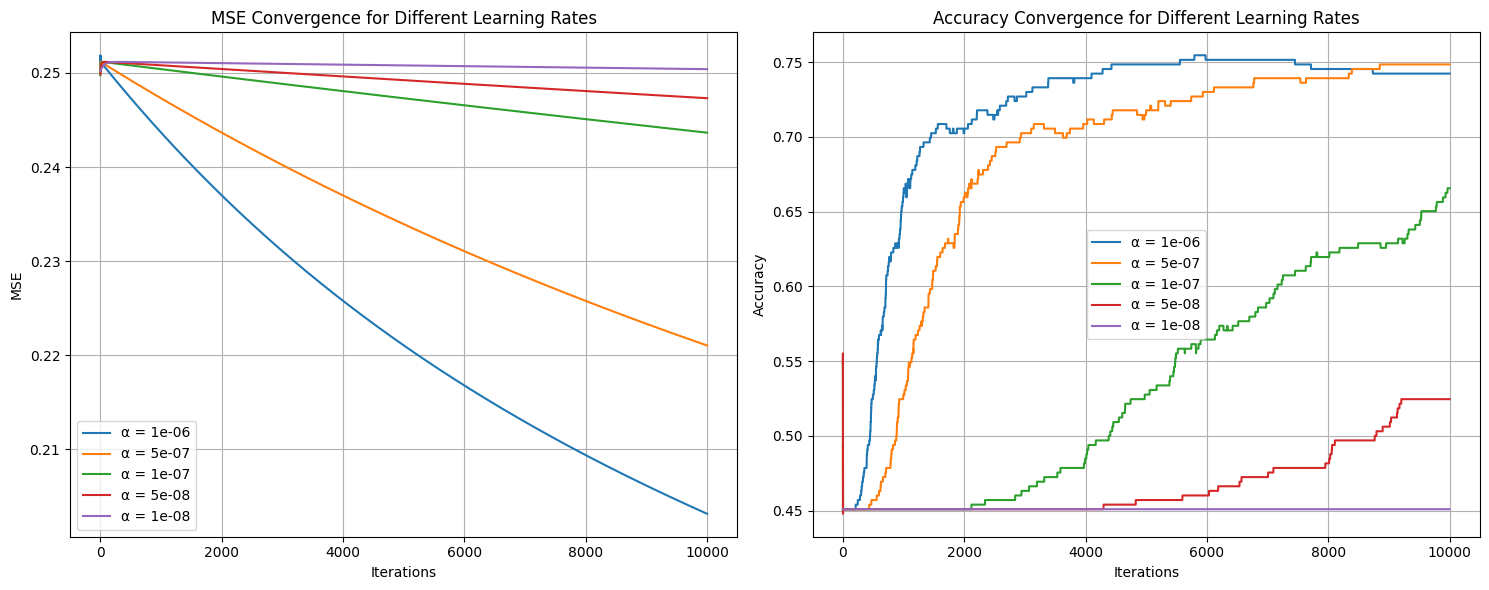

In [35]:
valores_alpha = [1e-6, 5*1e-7, 1e-7, 5*1e-8, 1e-8]
alpha_mse_lists = []
alpha_acc_lists = []
num_it = 10000

for alpha in valores_alpha:
    print(f"\nDescenso de gradiente para alpha = {alpha}")
    w_final, b_final, train_mse, train_acc, test_mse, test_acc = gradient_descent(X_train_norm, y_train, 
                                                                                  X_test_norm, y_test, 
                                                                                  alpha=alpha, num_it=10000)
    alpha_mse_lists.append(test_mse)
    alpha_acc_lists.append(test_acc)

plt.figure(figsize=(15, 6))

# Graficamos convergencia del MSE
plt.subplot(1, 2, 1)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_mse_lists[i], label=f'α = {alpha}')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.title('Convergencia del MSE para diferentes tasas de aprendizaje')
plt.legend()
plt.grid(True)

# Graficamos convergencia de accuracy
plt.subplot(1, 2, 2)
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_acc_lists[i], label=f'α = {alpha}')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.title('Convergencia de la accuract para diferentes tasas de aprendizaje')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Ejercicio 7

In [ ]:
def confusion_matrix(y_true, y_pred):
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TP = np.sum((y_true == 1) & (y_pred == 1))
    
    return np.array([[TN, FP],
                     [FN, TP]])



# Parte 2

## Ejercicio 2

## Ejercicio 3